# Compressing Data via Dimensionality Reduction.

En el capitulo 4, aprendimos sobre diferentes tecnicas relacionadas a reducir la dimensionalidad de la dat utilizando diferentes tecnicas de features selection. Un aproach alternativo es la de realizar **feacture extraction**. En este capitulo se veran dos tecnicas fundamental que nos ayudaran a resumir la informacion de esta presente en nuestro dataset transformandolo en un nuevo subespacio de features pero de menor dimension.

En este capitulo se veran los siguientes temas:
- Principal component analysis para data compression sin supervisar
- Linear discrimant analysis como una tecnica de reduccion de dimensionalidad supervisada para maxima separacion de clases
- Una introduccion a metodos de separacion para features no lineales y t-distributed stoachstic neigbor embedding for data visualization.

## Unsupervied dimensioanlity reduction via principal component analysis.
La mayor diferencia enter lo que vimos en el capitulo anterior (features selection) y lo que veremos ahora (features extracion) en que cuando realizamos *FS*, estamos seleccionando features relevantes para el problema, pero el espacio en el que trabajamos sigue siendo el mismo. Mientra que el realizar *FE* lo que estamos haciendo es proyectar nuestros datos en un nuevo *espacio de features*

### Them main steps in principal component analysis.
En esta seccion se el algoritmos PCA, es una tecnica de transformacion lienal no supervisada que se usa en muchos campos, sobretodo para feature extractin y reduccion de dimensioanlidad. Otras aplicaciones populares de PCA includen EDA y denoising of signals ins tock market trandinct.

PCA nos ayuda a identificar patronesen nuestros datos basado en la correlacion entre features. Basicamente, PCA busca encontrar las direcciones de maxima varianza en un entorno altamente dimensional y proyectarla en un nuevo subespacio de igual o menor dimension que el original. Los vertices ortogonales (los componentes principales) del nuevo subespacio pueden ser interpretados como las direcciones de maxima varianza dado el vinculo de que en el nuevo subespacio las features son ortogonales entre ellas

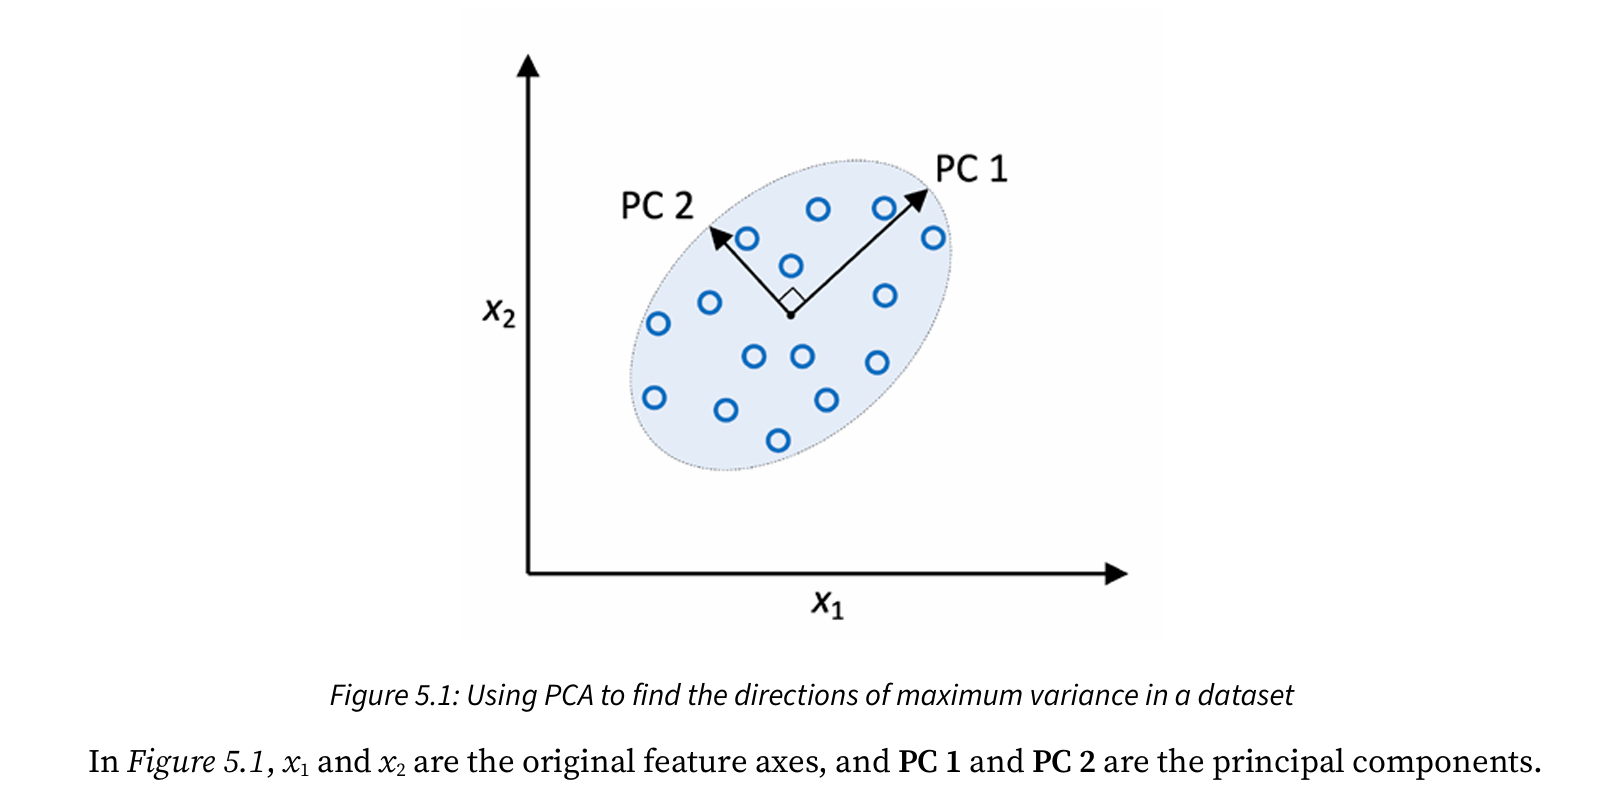

Si usamos PCA para reduccion de dimensioanlidad, lo que estamos haciedno es contruir una matriz de transformacion de $d \times k$ que nos permite mapear un vector en el espacio de features  $x$ a un nuevo subpesacio. Donde la transformacion viene dada por:

$$
xW=z
$$
donde $z$ es el nuevo vector de features en el nuevo subespacio.

Como consecuecia del mapeo, en general el primer componenete de $z$ tendra la varianza mas grande. El resto de los compoenentes tendran la varianza mas grande dado el vinculo que todos estos componenetes son ortogonales entre si, incluso si las features originales si estan correlacionadas.

Para resumir como aplicar PCA:
- Estandarizamos nuestro d-dimensions dataset
- Construimos la matriz de covarianza
- Descomponemos la matriz de covarianza en sus autovectores y autovalores
- Ordenamos de mayor a menos los autovalores para poder rankear los autovectores asociados.
- Seleccionamos $k$ autovectores, que corresponderan con los $k$ primeros autovalores y que sera la dimension del nuevo subespacio
- Construimos la matriz de proyeccion $W$
- Transformacion el dataset input usando la matriz de proyeccion y obtenemos le nuevo subespacio.

### Extrancting the principal component step by step.
En esta subseccion, haremos los primeros pasos del PCA:
- Estandarizar la data
- Construir la matriz de covarianza
- Obtener los autovectores y autovalores de la matriz de covarianza
- Ordernar los autovalores de mayor a menos

Empezaremos por descargar el dataset de vinos

In [1]:
import pandas as pd
df_wine = pd.read_csv(
      'https://archive.ics.uci.edu/ml/'
      'machine-learning-databases/wine/wine.data',
      header=None
  )

In [2]:
# Separamos el dataset en train test
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3,
                      stratify=y,
                      random_state=0)
  # standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Ya con esto realizado podemos contruir la matriz de covarianza, la misma es una matriz simetrica de $d \times d$. Est almacena la covarainza entre las diferentes combiancioens de features.

$$
\sigma_{jk} = \frac{1}{n-1} \sum_{i=1}^{n} (x^{(i)}_{j}-\mu_{j})(x^{(i)}_{k}-\mu_{k})
$$

donde $\mu_{j}$ u $\mu_{k}$ son la sample mean de las features $j$ y $k$ respectivamente. Notar que si estandarizamos el dataset, todas las featurees tendran mean cero lo cual simplifica de gran manera la matriz de covarianza.

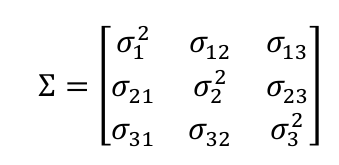

Los autovectores de la matriz de covarianza representan los componentes principales (direccion de maxima varianza).

In [3]:
# Buscamos los autovectores y autovalores
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


### Total and explained variance
Ya que buscamos reducir la dimensioanlidad de nuestro dataset comrpimiendola en un nuevo subespacio de feautres, solo seleccionamos un subgrupo de autovectores (componenetes principales) que contienen la vayor informaicon. Los autovalores determinan la maginitud de los autovalores, por lo que estamos interesados en el top $k$ de autovectores bsados en el valor de su correspondiente autovalor. Pero antes de eso, grafiquemos la **vairance explained ratios** de los autovalores. Esta esta definidia como el ratio de un autovalor $\lambda_{j}$

$$
\frac{\lambda_{j}}{\sum_{j=1}^{d}\lambda_{j}}
$$

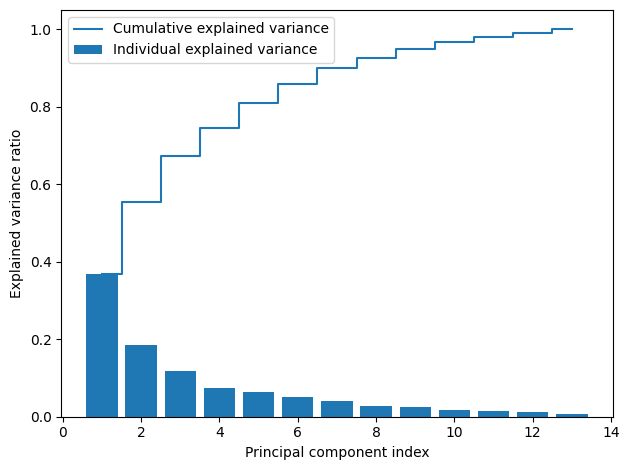

In [4]:
# usando la funcion de numpy cumsum podemos calcular la suma acumulada de la explained variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
             
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center',
 
         label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
 
          label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Feature transformation
Ahora que descompusimos la matriz de covarianza en sus componentes principalas, hagamos los ultimos tres pasos para transfomar el datasets de vino.
- Seleccionar los $k$ autovalores de mayor tamaño
- Contruir la matiz $W$
- Transformar the d-dimensioanl dataset utiliznado la matriz $W$

In [5]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])                 
for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [6]:
# nos quedamos con solo 2 autovalores ya que representan el 60% de la varianza
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
    eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [7]:
#Transformatmos todo el dataset de entranamiento
X_train_pca = X_train_std.dot(w)

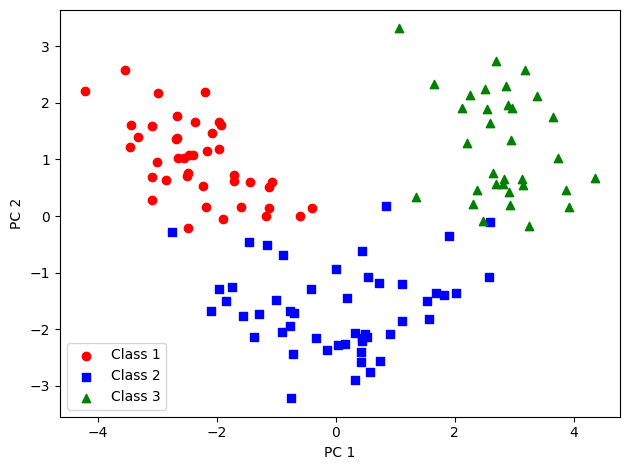

In [8]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
 
     plt.scatter(X_train_pca[y_train==l, 0],
 
 
                 X_train_pca[y_train==l, 1],
                 c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Podemos ver como poudimos transformar nuestro universo de features a un subespacio de solo 2, donde vemos que hay mas dispersion en un eje que en el otro lo cual es consistente.

Recordar que PCA es un metodo de reduccion no supervisado, por lo que los labels son a modo demostrativo o exploratorio.

### PCA in scikit learn
PCA es parte del paquete de transformers en scikit learn.

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

c:\Users\ivanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


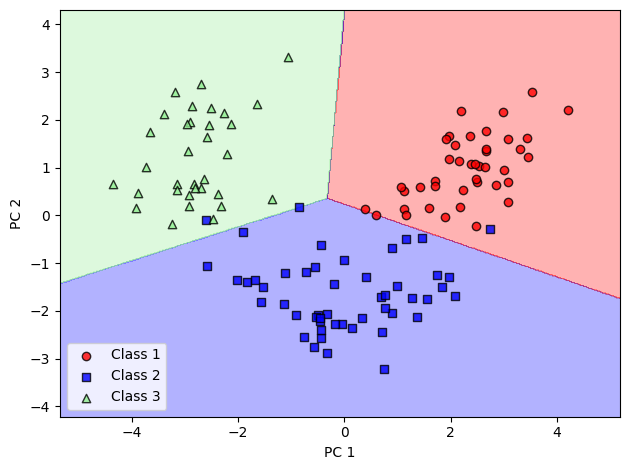

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                          random_state=1,
                          solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Supervised data compression via linear discriminant analysis.
LDA funciona de manera parecida a PCA, pero donde PCA busca hallar los componentes ortogonales donde la varianza es maxima, LDA busca crear un subespacio que maximice la separacion de clases.

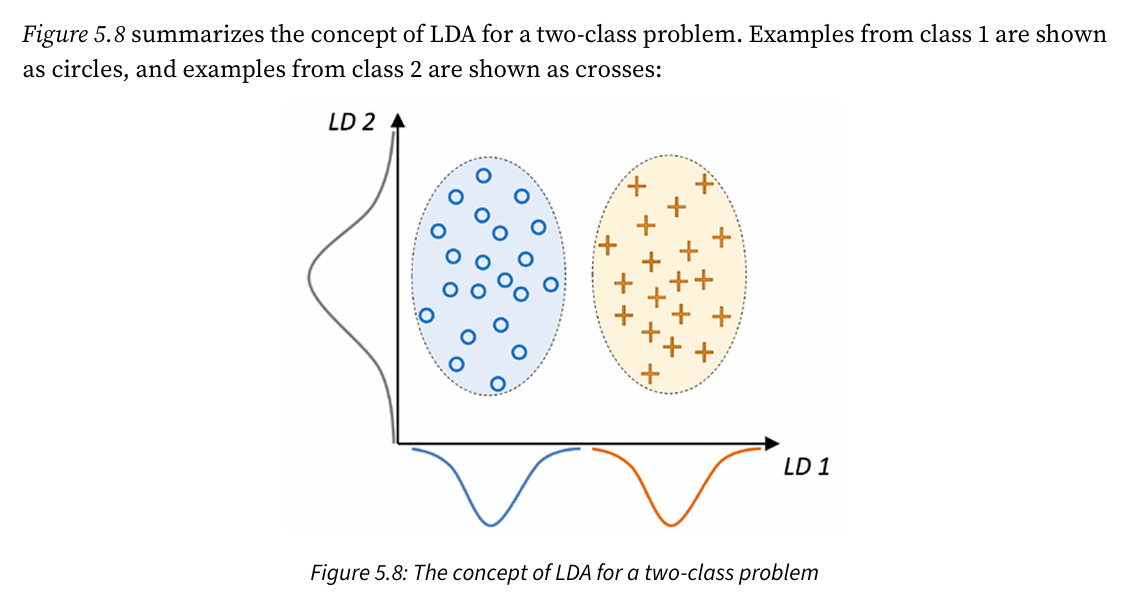

### Hipotesis de LDA
Una de las hipotesis importantes de LDA es que toda la clases involucradas poseen una distribucion normal, ademas de que deben tener matrices de covarianza identicas y que las medidas son estadisticamente independientes.

Aun asi, si alguna de estas condiciones se incumple LDA podria funcionar razonablemente bien.

### The inner workings of LDA
Vamos a resumir el como funciona LDA
 1. Standardize the d-dimensional dataset (d is the number of features).
 2. For each class, compute the d-dimensional mean vector.
 3. Construct the between-class scatter matrix, SB, and the within-class scatter matrix, SW.
 4. Compute the eigenvectors and corresponding eigenvalues of the matrix, 𝑺𝑺𝑊𝑊
 −1𝑺𝑺𝐵𝐵 .
 5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
 6. Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d×k-di
mensional transformation matrix, W; the eigenvectors are the columns of this matrix.
 7. Project the examples onto the new feature subspace using the transformation matrix, W.